In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (15,8)

In [350]:
df = pd.read_csv('Python_Clustering_Pr.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [351]:
df1 = df.copy()

In [352]:
df.shape

(569, 32)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [354]:
df.drop(['id'], axis =1, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [355]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

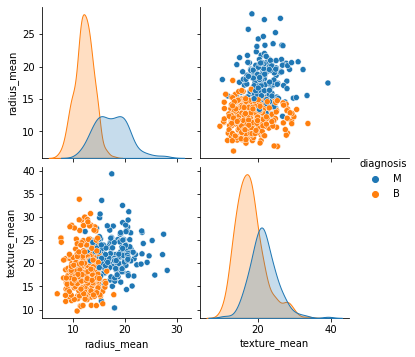

In [356]:
# pair plot between two column radius_mean and radius_mean by diagnosis
sns.pairplot(data= df[['radius_mean', 'texture_mean','diagnosis']], hue='diagnosis');

In [357]:
df.drop(['diagnosis'], axis =1, inplace=True)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [358]:
df_new = df[['radius_mean', 'texture_mean']]

In [359]:
col = df_new.columns
col

Index(['radius_mean', 'texture_mean'], dtype='object')

In [360]:
from sklearn.preprocessing import StandardScaler

In [361]:
sc = StandardScaler()

In [362]:
df_new = sc.fit_transform(df_new)

In [363]:
df_new = pd.DataFrame(df_new,columns= col)
df_new.head()

,radius_mean,texture_mean
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816


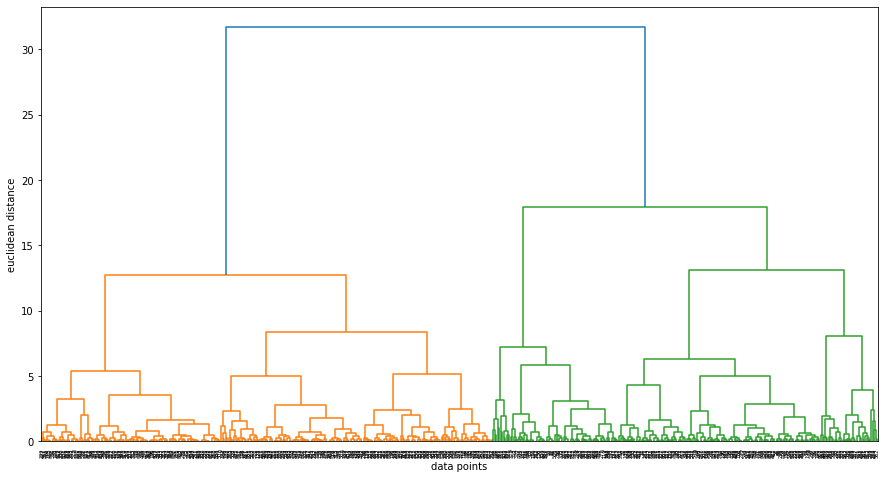

In [364]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df_new, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [365]:
from sklearn.cluster import AgglomerativeClustering

In [366]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df_new)

In [367]:
df_new["label"] = cluster

In [368]:
df_new.head()

,radius_mean,texture_mean,label
0,1.097064,-2.073335,1
1,1.829821,-0.353632,0
2,1.579888,0.456187,0
3,-0.768909,0.253732,1
4,1.750297,-1.151816,0


In [369]:
df_new.label.value_counts()

1    306
0    263
Name: label, dtype: int64

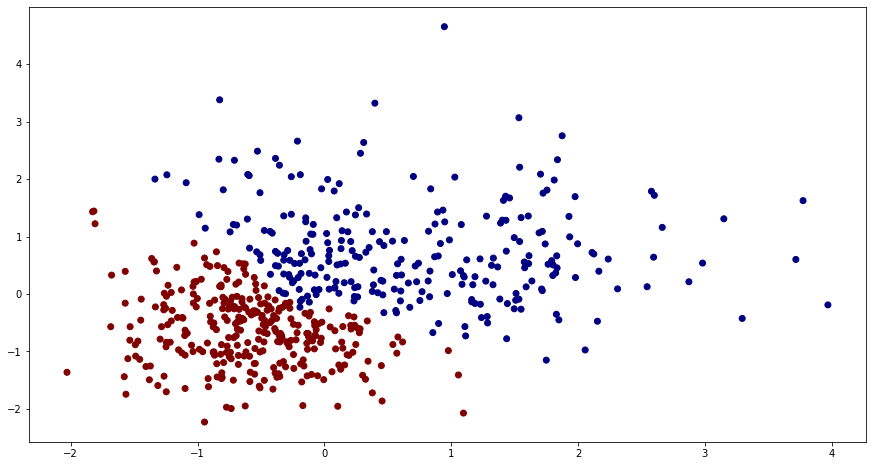

In [370]:
plt.scatter(df_new.radius_mean, df_new.texture_mean, c=df_new.label, cmap='jet');

In [371]:
score = silhouette_score(df_new, cluster)
score

0.4717861439453535

# K-means

In [372]:
from sklearn.cluster import KMeans

In [373]:
km = KMeans(n_clusters=2)

In [374]:
y_predicted = km.fit_predict(df_new)
y_predicted

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [375]:
df_new['cluster']=y_predicted
df_new.head()

,radius_mean,texture_mean,label,cluster
0,1.097064,-2.073335,1,0
1,1.829821,-0.353632,0,1
2,1.579888,0.456187,0,1
3,-0.768909,0.253732,1,0
4,1.750297,-1.151816,0,1


In [376]:
# WCSS Score
wcss = km.inertia_
wcss

634.9369641063292

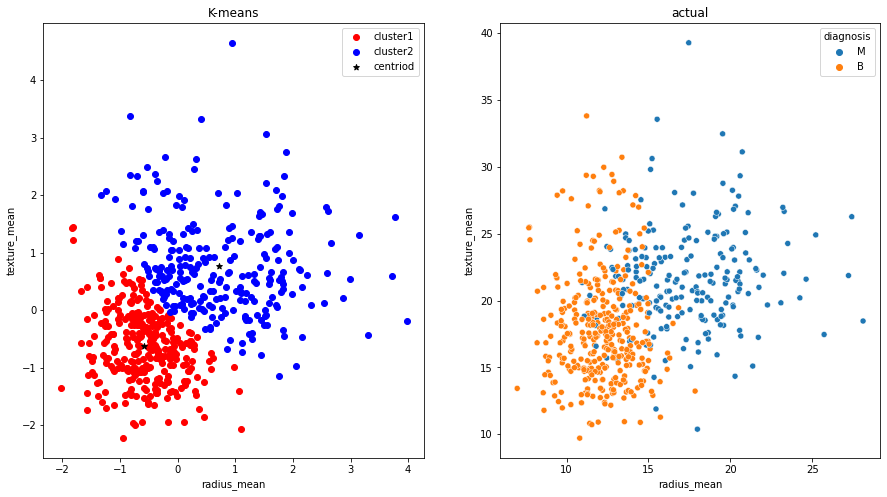

In [377]:
plt.subplot(1,2,1)
plt.scatter(df_new[df_new['cluster'] ==0]['radius_mean'],df_new[df_new['cluster'] ==0]['texture_mean'], color = 'red', label='cluster1',
           cmap='jet')
plt.scatter(df_new[df_new['cluster'] ==1]['radius_mean'],df_new[df_new['cluster'] ==1]['texture_mean'], color = 'blue', label='cluster2',
           cmap='jet')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='black', marker = '*', label= 'centriod')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-means')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x= df1.radius_mean, y=df1.texture_mean, data=df1, hue=df1.diagnosis)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('actual')
plt.show()

In [378]:
## Checking Score
from sklearn.metrics import silhouette_score
score = silhouette_score(df_new, y_predicted)
score

0.5197519851888899

In [379]:
krng = range(1,11)
wcss = []
for k in krng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df_new)
    wcss.append(km.inertia_)


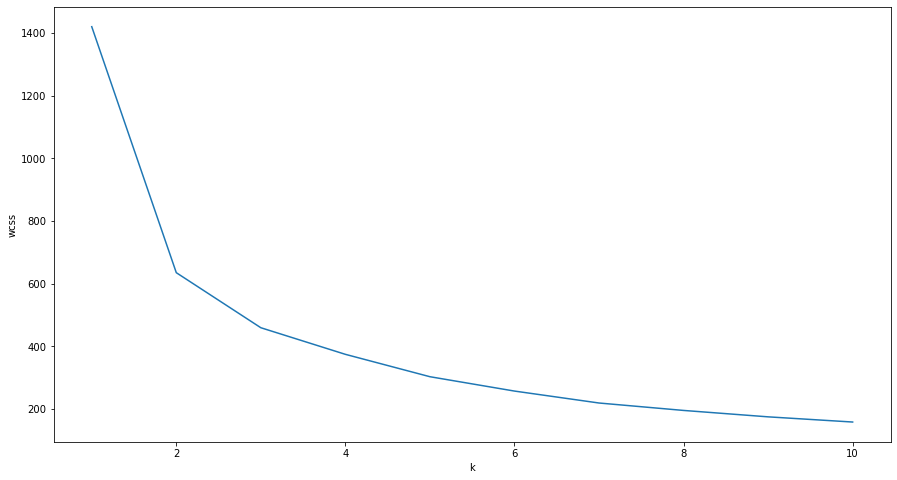

In [380]:
plt.xlabel('k')
plt.ylabel('wcss')
plt.plot(krng, wcss);

In [381]:
wcss

[1420.2601054481547,
 634.9369641063292,
 459.19526218681295,
 374.27185690146484,
 302.82799179619315,
 257.0005701707716,
 218.87167277419542,
 195.17718193855183,
 174.70717957901712,
 158.15005235483153]

## K=2 is already high value so our cluster is already Optimum

## Instead of using only radius_mean and texture_mean using entire data set

In [382]:
## Applying PCA to reduce dimension to 2 to plot
#feature preprocessing
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [383]:
# creating PCA component

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [384]:
# using pca 30 feature dataset converted into 2 feature this dimensionality reduction
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


In [385]:
df1.diagnosis = df1.diagnosis.map({'M':1,'B':0})

In [386]:
X = df1.drop(['id','diagnosis'], axis=1)

In [387]:
km = KMeans(n_clusters=2)

In [388]:
kms = km.fit_predict(X)

### high score

In [389]:
score = silhouette_score(X,kms)
score

0.6972646156059465

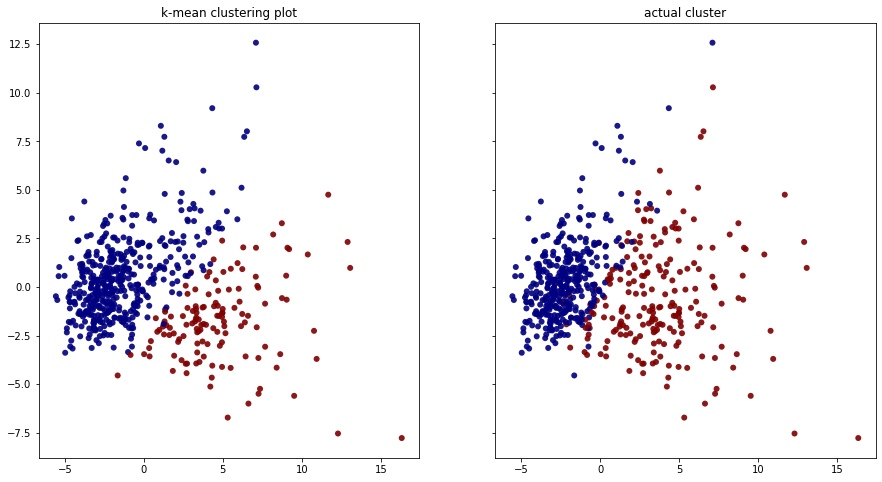

In [390]:

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.scatter(x_pca[:,0], x_pca[:, 1], c=kms, cmap='jet', edgecolor='None', alpha=0.9)
ax1.set_title('k-mean clustering plot')

ax2.scatter(x_pca[:,0], x_pca[:, 1], c=df1.diagnosis, cmap='jet', edgecolor='None', alpha=0.9)
ax2.set_title('actual cluster')
plt.show()